## **Parcial 2 - Parte 2.**

### **Física Computacional I.**

$$\ $$

### **José Luis Builes Canchala.** - jose.builesc@udea.edu.co
#### **C.C.** 1035442832

$$\ $$

## **Punto 1: Fit curve.**

In [1]:
 #i Importando librerías.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

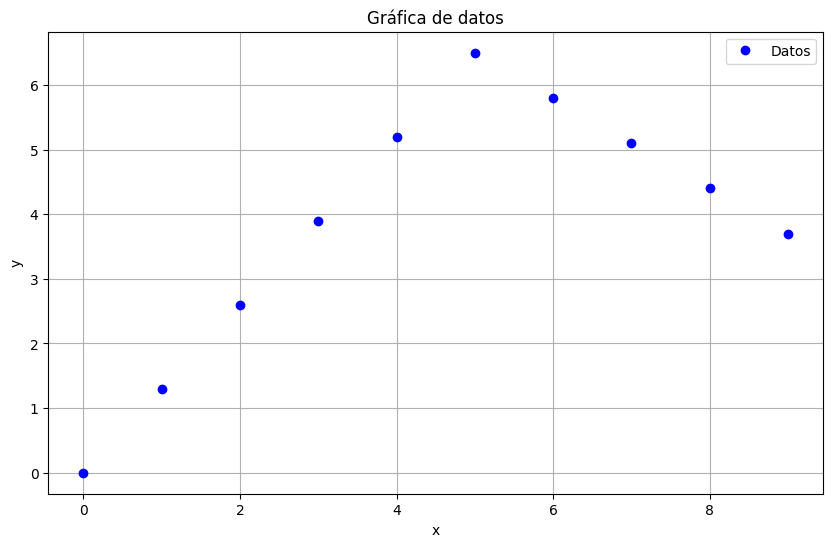

In [2]:
# Subiendo archivo.
dfc = pd.read_csv("/content/fit_curve.csv")

# Gráfica de dataframe.
plt.figure(figsize=[10, 6])
plt.plot(dfc['x'], dfc['y'], 'o', color = 'blue', label = 'Datos')
plt.grid()
plt.legend()
plt.title('Gráfica de datos')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Dada la forma de los datos, se plantea un ajuste de tipo función cuadrática invertida (polinomio general de grado 2), de la forma: 

$$f(x) = y = -ax^2 + bx + c$$

Usando las funciones de la librería *scipy* de *Python*, en específico *curve_fit*, se  el siguiente ajuste.

Los valores de los parámetros a, b y c son, respectivamente: [-0.18939394  2.15606061 -0.45454545]


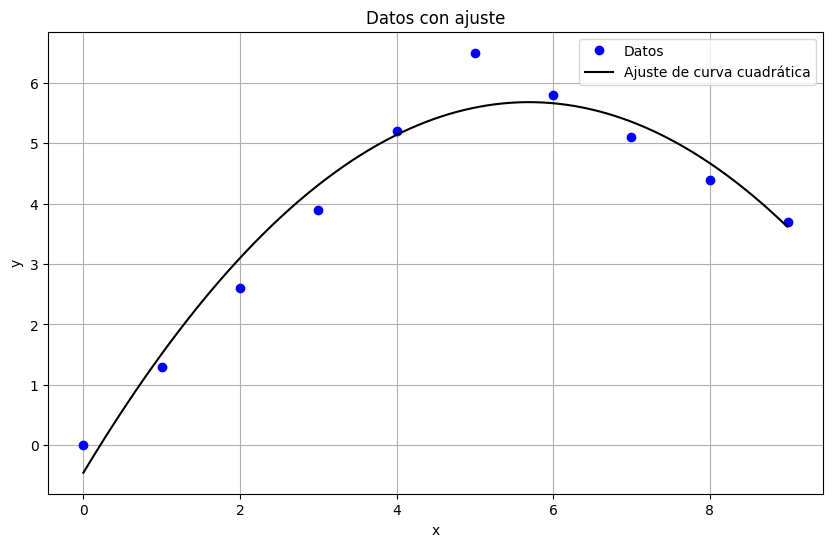

In [3]:
# Función para ajustar.
def cuad(x, a, b, c):
    return a*x**2 + b*x + c

# Ajustando curva.
popt, pcov = curve_fit(cuad, dfc['x'], dfc['y'])

print('Los valores de los parámetros a, b y c son, respectivamente:', popt)

# Arreglo para curva de ajuste continua.
xp = np.arange(dfc['x'][0], dfc['x'][len(dfc['x']) - 1], 0.01) 

# Gráfica.
plt.figure(figsize=[10, 6])
plt.plot(dfc['x'], dfc['y'], 'o', color = 'blue', label = 'Datos')
plt.plot(xp, cuad(xp, *popt), color = 'k', label = 'Ajuste de curva cuadrática')
plt.grid()
plt.legend()
plt.title('Datos con ajuste')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Para calcular el error asociado a este ajuste se usará la noción del error absoluto de los datos, verificando si la curva utilizada para ajustar los datos funciona eficientemente. Por lo tanto, calculando la diferencia entre cada uno de los datos con su correspondiente par del ajuste al cuadrado, sumando esto y dividiéndolo por el total de los datos se obtiende un error "promedio del ajuste". Esto se puede observar en forma matemática con la siguiente expresión:

$$e(p) = \sum_{i=1}^N \frac{ \left[ f(x_i, p) - y_i \right ]^2 }{N}$$

Donde $p$ se refiere a los parámetros del ajuste (obtenidos anteriormente), $f(x,p)$ es la curva ajustada, $x$ y $y$ son los datos originales, de uno en uno, y $N$ es el número de datos originales.

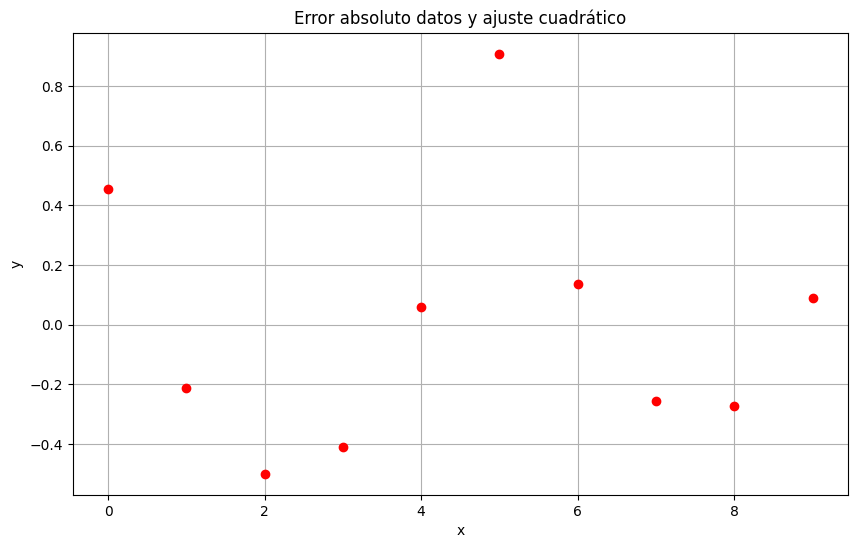


 --------------------------------------------------------

El error promedio de los datos ajustados a una curva cuadrática es de:  0.1667


In [4]:
# Calculando y graficando el error del ajuste.

def errabsprom(y, yaj): # Función para error.
  s = 0
  l = []

  for i in range(len(y)):
    a = (y[i] - yaj[i]) # Error absoluto.
    s += (a**2)/len(y) # Error promedio al cuadrado.
    l.append(a)

  return l, s

l, s = errabsprom(dfc['y'], cuad(dfc['x'], *popt))

plt.figure(figsize=[10, 6])
plt.plot(dfc['x'], l, 'o', color = 'red')
plt.grid()
plt.title('Error absoluto datos y ajuste cuadrático')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('\n --------------------------------------------------------')
print('\nEl error promedio de los datos ajustados a una curva cuadrática es de: ', np.round(s, 4))

In [5]:
# Calculando Chi Cuadrado para este ajuste. Similar al propuesto previamente.

chisquare = np.sum(((dfc['y'] - cuad(dfc['x'], *popt))**2)/cuad(dfc['x'], *popt))

print('El error chi cuadrado para el ajuste gaussiano es: ', np.round(chisquare, 4))

El error chi cuadrado para el ajuste gaussiano es:  -0.1229


Los valores de los parámetros norm, mean y sigma, respectivamente: [6.19486497 5.74654967 2.78281294]


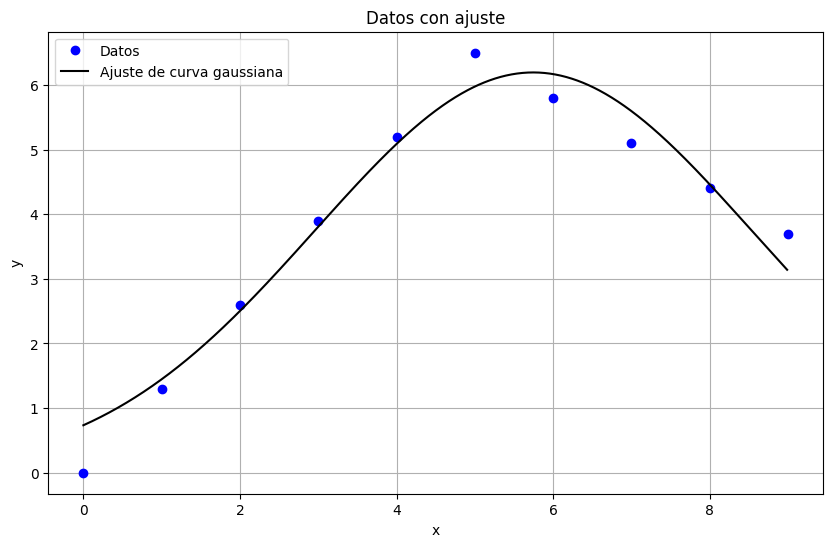

In [6]:
# Considerando la curva gaussiana para el ajuste.

def gauss(x, norm ,mean, sigma):
    return norm*np.exp(-(x - mean)**2/(2*sigma**2))

# Ajustando curva.
poptg, pcovg = curve_fit(gauss, dfc['x'], dfc['y'])

print('Los valores de los parámetros norm, mean y sigma, respectivamente:', poptg)

# Arreglo para curva de ajuste continua.
xpg = np.arange(dfc['x'][0], dfc['x'][len(dfc['x']) - 1], 0.01) 

# Gráfica.
plt.figure(figsize=[10, 6])
plt.plot(dfc['x'], dfc['y'], 'o', color = 'blue', label = 'Datos')
plt.plot(xpg, gauss(xpg, *poptg), color = 'k', label = 'Ajuste de curva gaussiana')
plt.grid()
plt.legend()
plt.title('Datos con ajuste')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

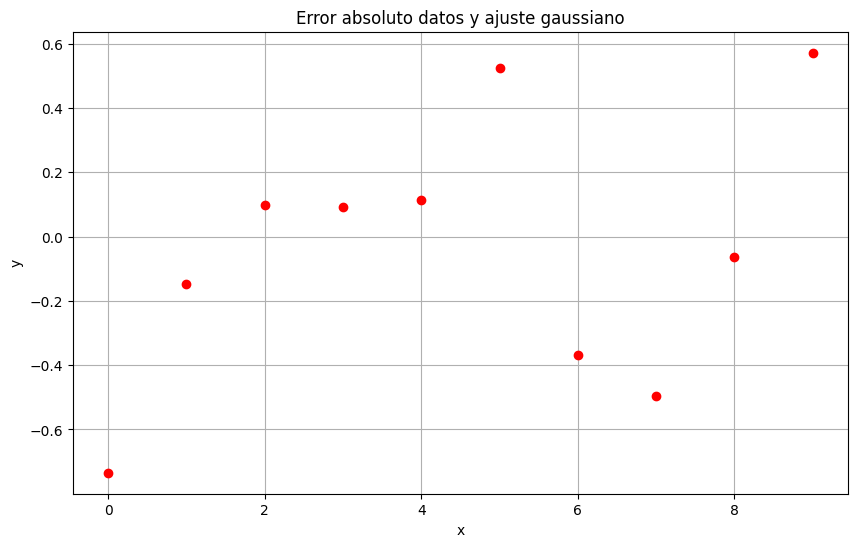


 --------------------------------------------------------

El error promedio de los datos ajustados a una curva cuadrática es de:  0.1582


In [7]:
# Mientras que el error, análogamente al previo.

lg, sg = errabsprom(dfc['y'], gauss(dfc['x'], *poptg))

plt.figure(figsize=[10, 6])
plt.plot(dfc['x'], lg, 'o', color = 'red')
plt.grid()
plt.title('Error absoluto datos y ajuste gaussiano')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('\n --------------------------------------------------------')
print('\nEl error promedio de los datos ajustados a una curva cuadrática es de: ', np.round(sg, 4))

In [8]:
# Calculando Chi Cuadrado para este ajuste. Similar al propuesto previamente.

chisquareg = np.sum(((dfc['y'] - gauss(dfc['x'], *poptg))**2)/gauss(dfc['x'], *poptg))

print('El error chi cuadrado para el ajuste gaussiano es: ', np.round(chisquareg, 4))

El error chi cuadrado para el ajuste gaussiano es:  0.9758


Los valores de los parámetros b, norm, mean y sigma, respectivamente: [-1.26933253e+04  1.26946350e+04  3.05201462e+00  1.83045467e+02]


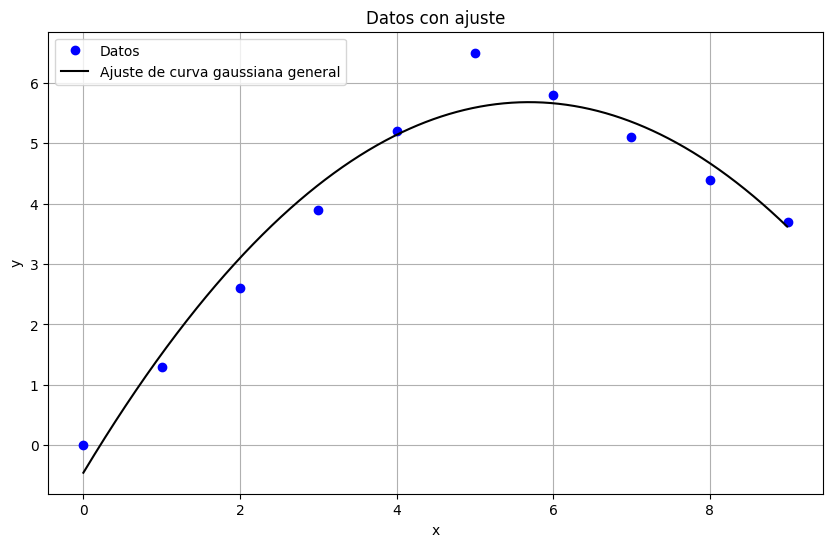

In [9]:
# Considerando una función gaussiana más general.

def gaussGen(x, b, norm ,mean, sigma):
    return x + b + norm*np.exp(-(x - mean)**2/(2*sigma**2))

# Ajustando curva.
poptgg, pcovgg = curve_fit(gaussGen, dfc['x'], dfc['y'])

print('Los valores de los parámetros b, norm, mean y sigma, respectivamente:', poptgg)

# Arreglo para curva de ajuste continua.
xpgg = np.arange(dfc['x'][0], dfc['x'][len(dfc['x']) - 1], 0.01) 

# Gráfica.
plt.figure(figsize=[10, 6])
plt.plot(dfc['x'], dfc['y'], 'o', color = 'blue', label = 'Datos')
plt.plot(xpgg, gaussGen(xpgg, *poptgg), color = 'k', label = 'Ajuste de curva gaussiana general')
plt.grid()
plt.legend()
plt.title('Datos con ajuste')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

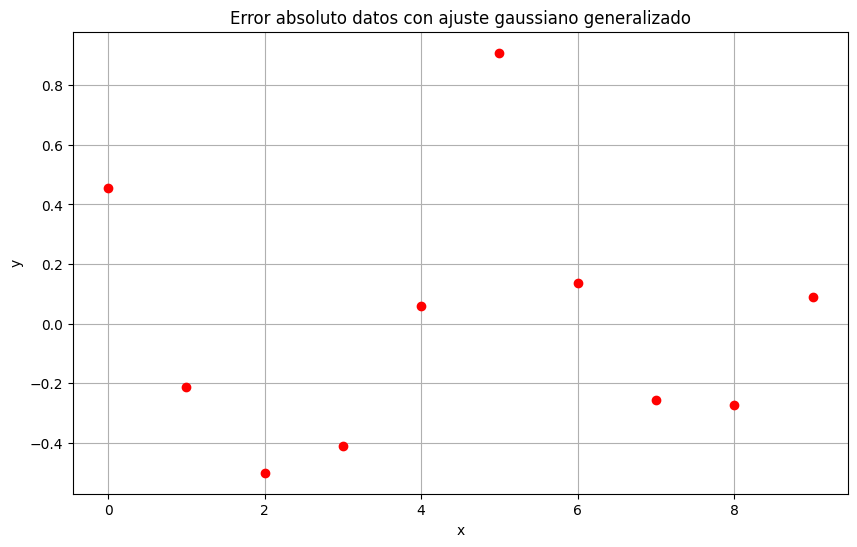


 --------------------------------------------------------

El error promedio de los datos ajustados a una curva gaussiana generalizada es de:  0.1667


In [20]:
# Mientras que el error, análogamente al previo.

lgg, sgg = errabsprom(dfc['y'], gaussGen(dfc['x'], *poptgg))

plt.figure(figsize=[10, 6])
plt.plot(dfc['x'], lgg, 'o', color = 'red')
plt.grid()
plt.title('Error absoluto datos con ajuste gaussiano generalizado')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('\n --------------------------------------------------------')
print('\nEl error promedio de los datos ajustados a una curva gaussiana generalizada es de: ', np.round(sgg, 4))

In [11]:
# Calculando Chi Cuadrado para este ajuste. Similar al propuesto previamente.

chisquaregg = np.sum(((dfc['y'] - gaussGen(dfc['x'], *poptgg))**2)/gaussGen(dfc['x'], *poptgg))

print('El error chi cuadrado para el ajuste gaussiano generalizado es: ', np.round(chisquaregg, 4))

El error chi cuadrado para el ajuste gaussiano generalizado es:  -0.1231


De esta forma se puede observar que el mejor ajuste para los datos correspondió al ajuste usando la gaussiana clásica. El caso cuadrático y de la gaussiana generalizada tuvieron comportamientos bastante similares, y aunque no son malos ajustes si se observan los resultados de la prueba de chi cuadrado, el menor error obtenido corresponde al segundo caso.

## **Punto 2: Base de datos autos.**

In [21]:
# Subiendo y visualizando estructura de datos.
dfa = pd.read_csv("auto.csv")
dfa.head()

Unnamed: 0  symboling  normalized-losses         make aspiration  \
0           0          3                122  alfa-romero        std   
1           1          3                122  alfa-romero        std   
2           2          1                122  alfa-romero        std   
3           3          2                164         audi        std   
4           4          2                164         audi        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   compression-ratio  horsepower  peak-rpm  city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0        21          27  13495.0   
1                9.0       111.0    5000.0        21          27  16500.0   
2                9.0       154.0    5000.0        19          26  16500.0   
3               10.0       102.0    5500.0        24          30  13950.0   
4                8.0       115.0    5500.0        18          22  17450.0   

   city-L/100km horsepower-binned  diesel  gas  
0     11.190476            Medium       0    1  
1     11.190476            Medium       0    1  
2     12.368421            Medium       0    1  
3      9.791667            Medium       0    1  
4     13.055556            Medium       0    1  

[5 rows x 30 columns]

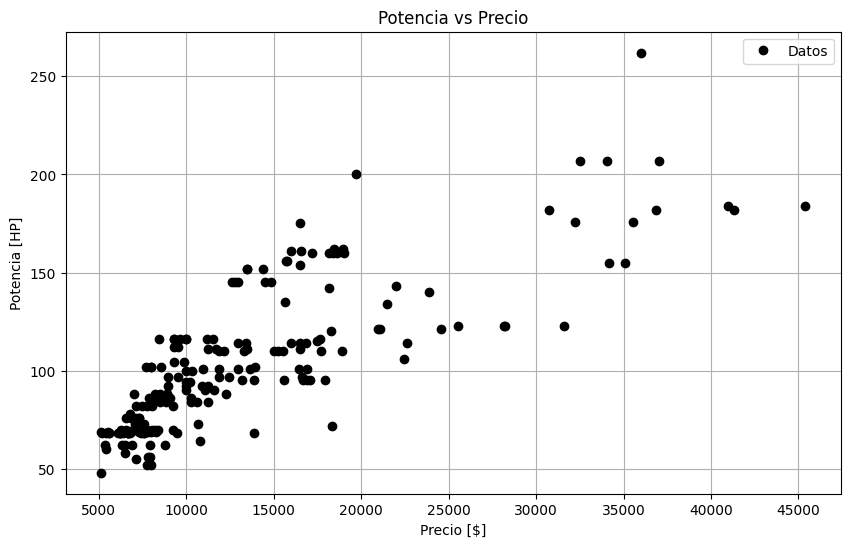

In [24]:
# Gráfica 1. Relación entre precio y potencia.

# Se deben organizar siempre los datos.
dfa.sort_values(by=['price'], ascending=True, inplace=True)
dfa.sort_values(by=['horsepower'], ascending=True, inplace=True)

# Graficando.
plt.figure(figsize=[10, 6])
plt.plot(dfa['price'], dfa['horsepower'], 'o', color = 'black', label = 'Datos')
plt.grid()
plt.title('Potencia vs Precio')
plt.xlabel('Precio [$]')
plt.ylabel('Potencia [HP]')
plt.legend()
plt.show()

Dada la gráfica obtenida en la celda previa es evidente que la relación entre precio de un auto y su potencia es linealmente creciente. A mayor potencia mayor costo tendrá un auto, en tanto esto significa un mayor gasto en los componentes del motor, así como en su tamaño y diseño más eficiente. Si bien a bajos precios hay una buena oferta de distintas potencias, conforme aumenta el precio las opciones son más limitadas y se tiene una potencia mínima.

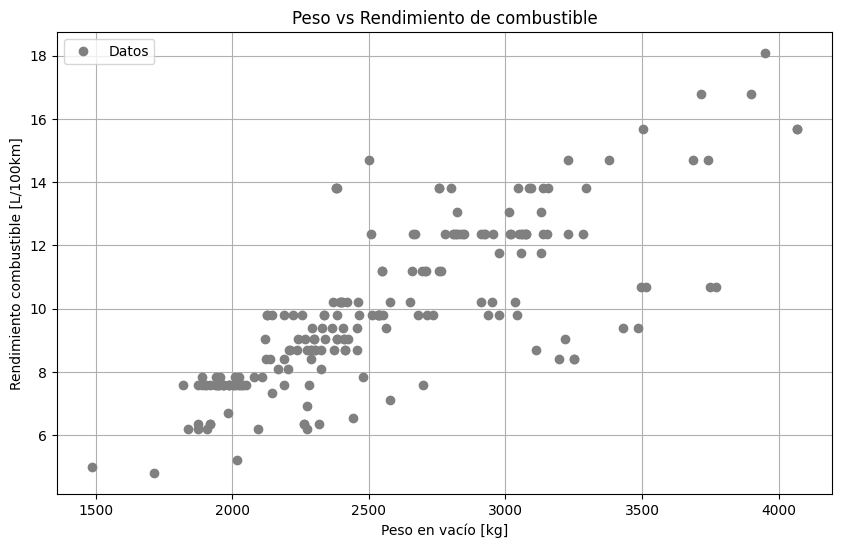

In [32]:
# Gráfica 2. Relación entre peso y rendimiento de combustible L/100km.

# Se deben organizar siempre los datos.
dfa.sort_values(by=['curb-weight'], ascending=True, inplace=True)
dfa.sort_values(by=['city-L/100km'], ascending=True, inplace=True)

# Graficando.
plt.figure(figsize=[10, 6])
plt.plot(dfa['curb-weight'], dfa['city-L/100km'], 'o', color = 'gray', label = 'Datos')
plt.grid()
plt.title('Peso vs Rendimiento de combustible')
plt.xlabel('Peso en vacío [kg]')
plt.ylabel('Rendimiento combustible [L/100km]')
plt.legend()
plt.show()

En el caso de la gráfica previa, se tiene que a mayor peso en los autos, estos tienen un mejor rendimiento de combustible en ciudad; puede deberse a la estabilidad de los mismos y a que estos al ser más grandes resultan con motores más óptimos.

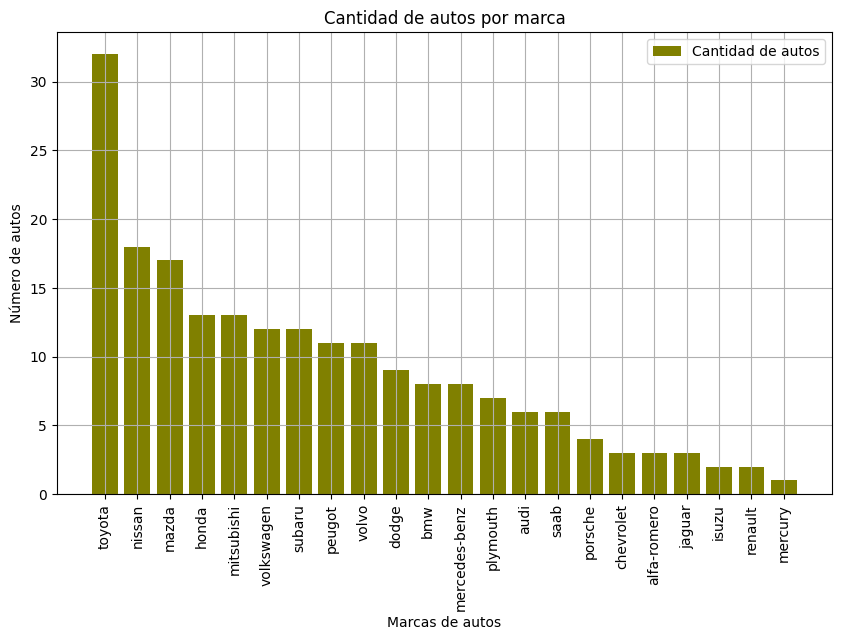

In [36]:
# Gráfica 3. Número de autos de cada marca.

# Contando los datos repetidos.
c = dfa['make'].value_counts()

# Gráfica.
plt.figure(figsize=[10, 6])
plt.bar(c.index, c.values, color='olive', label = 'Cantidad de autos')
plt.grid()
plt.title('Cantidad de autos por marca')
plt.xlabel('Marcas de autos')
plt.ylabel('Número de autos')
plt.xticks(rotation=90)
plt.legend()
plt.show()

El histograma anterior hace evidente una clara preferencia de los clientes por autos de la marca Toyota, abarcando la mayor parte de los autos vendidos, y por tanto dominando el mercado con una amplía diferencia. Las marcas que le siguen a estas se encuentran en valores bastante similares, mostrando que en este segmento del mercado se da una competencia equivalente. 

\

### **Informe.**

Estimado gerente, el presente informe tiene como fin expreso mostrarle algunas de las cifras que nuestro equipo de trabajo como analistas ha recopilado durante el presente mes. Hemos realizado una serie de análisis respecto a ciertas variables que nos generan malestar, en tanto estas pueden afectar las posibles estraategias de venta y por tanto las consecuentes ganancias respectivas de la empresa.

Utilizando las gráficas encontradas en este notebook, en específico la gráfica 1 y la gráfica 3, siendo las relación entre la potencia de un auto con su precio y la cantidad de autos vendidos de cada marca, respectivamente; se presentan las siguientes conclusiones y sugerencias para el mejoramiento y crecimiento de la compañía. 

1. Respecto a la gráfica 1, logramos notar que los autos de mayor potencia tienen precios más altos, resultando productivo para el negocio, pero la oferta de estos es mucho menor, por lo que los clientes al tener menos opciones de elección probablemente preferirán aquella situación donde existan mayores posibilidades. Por otro lado, en la gama de baja potencia, los precios varían significativamente ofreciendo la misma potencia; por lo que si se realiza un estudio de marketing apropiado que permita vender autos de la misma potencia a un mayor precio resultará efectivo para mejorar las ganancias.

2. Por otro lado, observando la gráfica 3, dado que la mayor parte de las ventas se concentra en la marca Toyota, se propone adquirir más vehículos de esta marca, en pro de conseguir una mayor cantidad de clientes basados en la regla de la oferta y la demanda. Si bien las otras marcas también aportan a las ventas del negocio, existen algunas que no son relevantes para el negocio, y que por tanto pueden resultar contraproducentes. Por lo que se sugiere retirar las marcas de los autos que casi no se venden de nuestro catálogo, mejorando la capacidad de *stock* de otros vehículos y adquisición de aquellos que si tienen buenas estadísticas.

Muchas gracias por su tiempo de lectura. Las opciones anteriores se presentan como sugerencia de nuestro equipo, y estamos prestos a cualquier duda que se pueda presentar o a alguna discusión para plantear otro tipo de posibilidades.
